In [28]:
import numpy as np
import matplotlib.pyplot as plt

Problema 4
1. Sea $H_n(i, j)=\frac{1}{i+j-1}$, llamada la matriz de Hilbert. Simule 1000 datos normales con matriz de covarianza $H_n$. Estime la matriz de covarianzas desde los datos simulados. Realice una gráfica de $n$ en el eje $x$ con el número condición de la matriz de covarianza estimada en el eje y. Recuerde que el número de condición es $\|A\|\left\|A^{-1}\right\|$. ¿Que tipo de comportamiento observa?

In [56]:
def hilbert_estimated_cov_condition_num(dim = 3):

    #Norma de frobenius
    frob = lambda A: np.trace(np.dot(A.T,A))**(1/2)

    #Matriz de Hilbert de orden n
    H = np.array([[1/(i+j+1) for j in range(dim)] for i in range(dim)])

    # Definir el vector de medias
    mean = np.array([0]*dim)

    # Numero de muestras
    num_samples = 1000

    # Generar datos con la matriz de hilbert como la matriz de covarianza
    data_samples = np.random.multivariate_normal(mean, H, num_samples)

    # Calucular la matriz de covarianza
    hilbert_est = np.cov(data_samples.T)

    # Calcular el numero condicion
    H_inv = np.linalg.inv(hilbert_est)
    condition_num = frob(H)*frob(H_inv)

    return condition_num

In [63]:
hilbert_estimated_cov_condition_num(3)

532.3361636268171

In [62]:
np.linalg.cond(np.array([[1/(i+j+1) for j in range(3)] for i in range(3)]))

524.0567775860644

Al plottear el numero condicion contra el numero de dimensiones, se observa como explota instantaneamente los valores del numero de condicion, esto se debe a que como la matriz de hilbert es una matriz singular o una matriz que no tiene un rango igual a sus dimensiones. Esta mal condicionado y por esto es que el numero de condicion explota tan rapido.

Aun mas toca generar datos para estimar el numero de condicion de la matriz de hilbert porque de otra manera, no se podria calcular el inverso de la matriz de hilbert en si

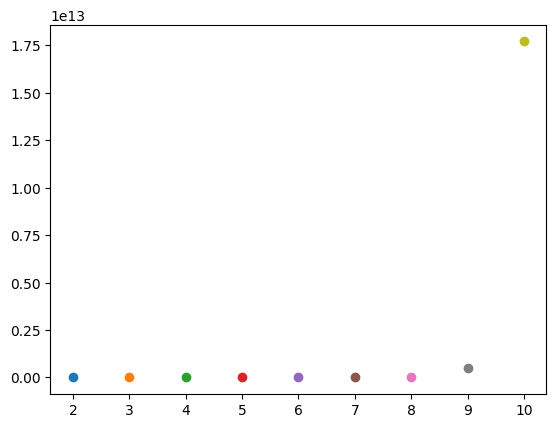

In [57]:
n=11
for i in range(2,n):
    cond_num = hilbert_estimated_cov_condition_num(i)
    plt.plot(i,cond_num, "o")

2. Considere $x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]$. Defina $b=H_{15}\cdot x$ y resuelva numéricamente el sistema con la forma $x=H^{-1} b$. ¿Qué conclusión obtiene? Busque alternativas para resolver el problema observado.

In [65]:
# Definiendo la matriz de Hilbert de orden 15 y x
H = np.array([[1/(i+j+1) for j in range(15)] for i in range(15)])
x = np.arange(1,16)

# Definiendo b
b = np.dot(H,x)

#Matriz de Hilbert de orden n
H = np.array([[1/(i+j+1) for j in range(15)] for i in range(15)])

H_inv = np.linalg.inv(H)

x_est = np.dot(H_inv,b)
x_est

array([ 2.90781948e+00,  1.97068466e+02, -6.24049805e+02,  5.84859375e+02,
       -1.25225000e+03,  4.75100000e+03, -7.84800000e+03,  6.35200000e+03,
       -2.33600000e+03, -6.40000000e+01,  3.84000000e+02, -1.44000000e+02,
        5.60000000e+01, -2.00000000e+00,  1.92656250e+01])

Dado a que la matriz de hilbert esta mal condicionada, la inversa no se logra calcular completamente bien, esto se observa al multiplicar H por su inversa, veamos un ejemplo en menores dimensiones:

In [ ]:
dim = 8
H = np.array([[1/(i+j+1) for j in range(dim)] for i in range(dim)])
H_inv = np.linalg.inv(H)
print(np.dot(H_inv,H))

[[ 9.99999959e-01 -3.54942290e-08 -3.15311938e-08 -2.83492451e-08
  -2.57293670e-08 -2.35542436e-08 -2.17137870e-08 -2.01369836e-08]
 [ 1.93540473e-07  1.00000017e+00  1.44405927e-07  1.28318125e-07
   1.15140820e-07  1.04748041e-07  9.60312097e-08  8.85932732e-08]
 [-1.76019967e-07 -1.43183628e-07  9.99999879e-01 -1.07877623e-07
  -9.15552376e-08 -8.21583937e-08 -7.57484733e-08 -6.81368053e-08]
 [-5.96046448e-08 -6.59052985e-08 -7.55407402e-08  9.99999949e-01
  -6.80554253e-08 -5.25203262e-08 -3.97067702e-08 -4.45309945e-08]
 [-1.19209290e-07 -5.26258758e-08 -7.03558852e-08 -8.00700590e-08
   9.99999990e-01 -7.07404377e-08 -6.15045052e-08 -5.40874811e-08]
 [ 2.68220901e-07  1.60287402e-07  1.44823865e-07  1.89102272e-07
   7.55120679e-08  1.00000013e+00  1.16878694e-07  8.51378712e-08]
 [-1.49011612e-07 -1.08772455e-07 -7.49582600e-08 -8.96126281e-08
  -3.68758580e-08 -6.39645374e-08  9.99999941e-01 -4.46280746e-08]
 [ 3.72529030e-08  1.38114195e-08  1.14115803e-08  2.16122256e-08
   

Por tanto para calcular a x otra vez, toca hacerlo a traves de algun otro metodo que no utilice la inversa, como lo es ...
